In [1]:
#!rm -rf code
#!git clone https://sergeivolodin@bitbucket.org/sergeivolodin/probabilisticneuronfailurecodenew.git code
#!mv code/* .
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_random import *
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


Initialized TensorFlow


### Fixed single random experiment for many random points

In [2]:
# pfailure for the first layer
p = 1e-3

In [3]:
# run with random weights and multiple inputs
exp = RandomExperiment([5, 6, 7, 1], p_inference = [0, p, 0, 0], activation = 'relu', std_weight = 3, mean_weight = 0.1, do_print = True)

Creating network for 5-dimensional input and 1-dimensional output, with 2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 36        
_________________________________________________________________
lambda_1 (Lambda)            (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 49        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 36 

In [4]:
data_points = 100

# inputs to test
data = np.random.randn(data_points, 5) * 2

# obtaining data
rmean, rstd = exp.run(data, repetitions = 10000)

In [5]:
# printing output shapes
print_shape(rmean, 'mean')
print_shape(rstd, 'std')

=== Shapes of mean ===
           name     shape
0      b1_1norm    (100,)
1      b1_2norm    (100,)
2    b1_infnorm    (100,)
3            b2  (100, 1)
4            b3  (100, 1)
5            b4  (100, 1)
6     sum_1norm        ()
7     sum_2norm        ()
8   sum_fronorm        ()
9   sum_infnorm        ()
10   experiment  (100, 1)
=== Shapes of std ===
         name     shape
0          b2  (100, 1)
1          b3  (100, 1)
2          b4  (100, 1)
3  experiment  (100, 1)


/localhome/volodin/miniconda3/envs/neuronfailure/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


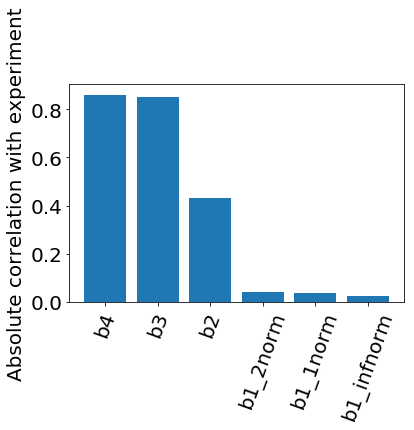

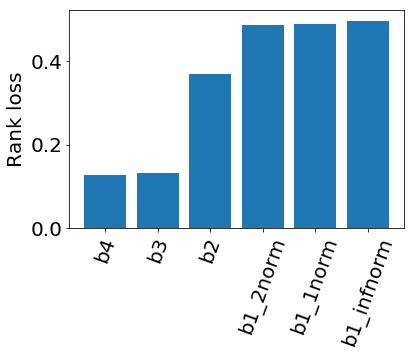

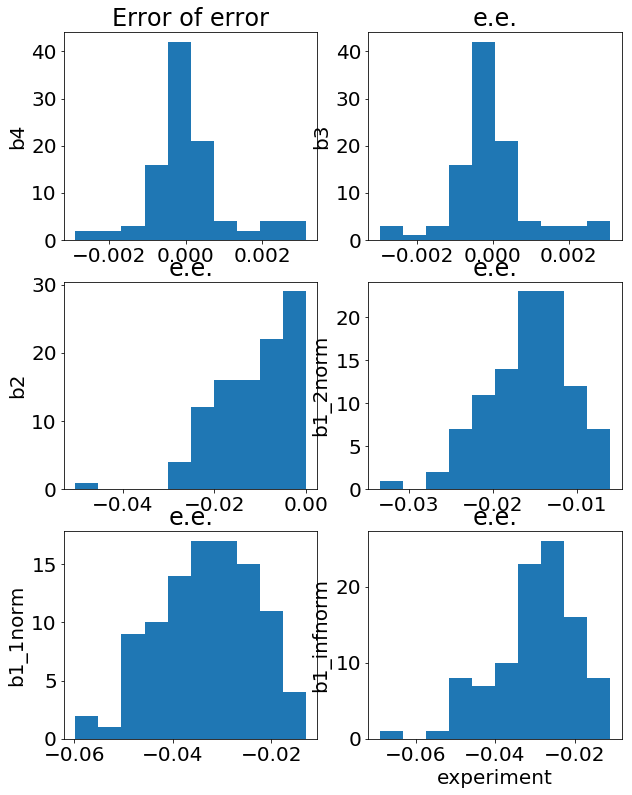

/localhome/volodin/code/process_data.py:105: RuntimeWarning: invalid value encountered in true_divide
  # plotting scatter plots with experimental mean, if requested
/localhome/volodin/code/process_data.py:106: RuntimeWarning: invalid value encountered in greater_equal
  if do_plot:
/localhome/volodin/code/process_data.py:105: RuntimeWarning: divide by zero encountered in true_divide
  # plotting scatter plots with experimental mean, if requested


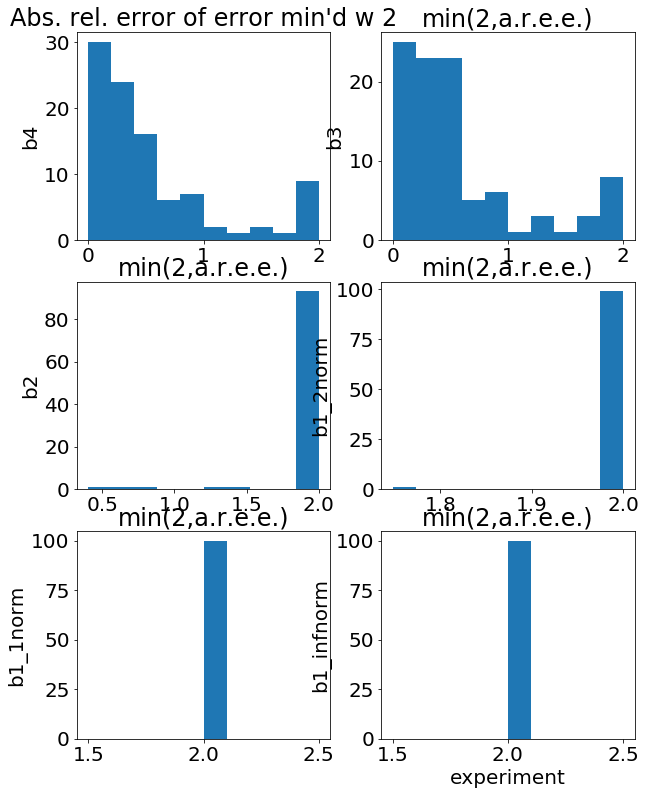

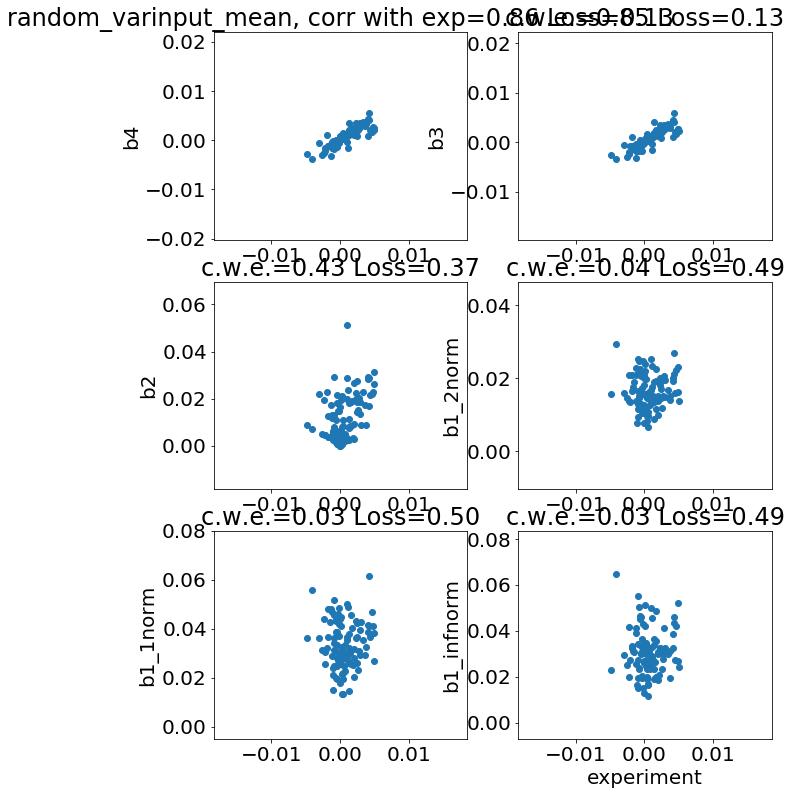

,bound,corr,rank_loss
0,b4,0.860604,0.130505
1,b3,0.850631,0.127273
2,b2,0.432443,0.370101
3,b1_2norm,0.042908,0.487677
4,b1_1norm,0.034847,0.497374
5,b1_infnorm,0.025818,0.488687


In [7]:
exp.process_scalar_output(rmean, 'random_varinput_mean')

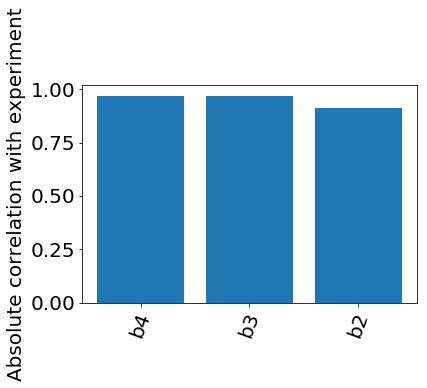

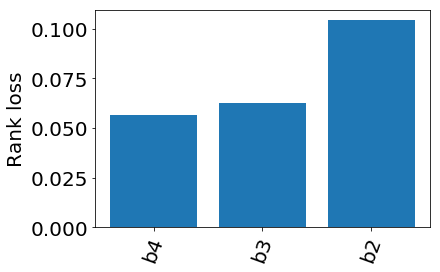

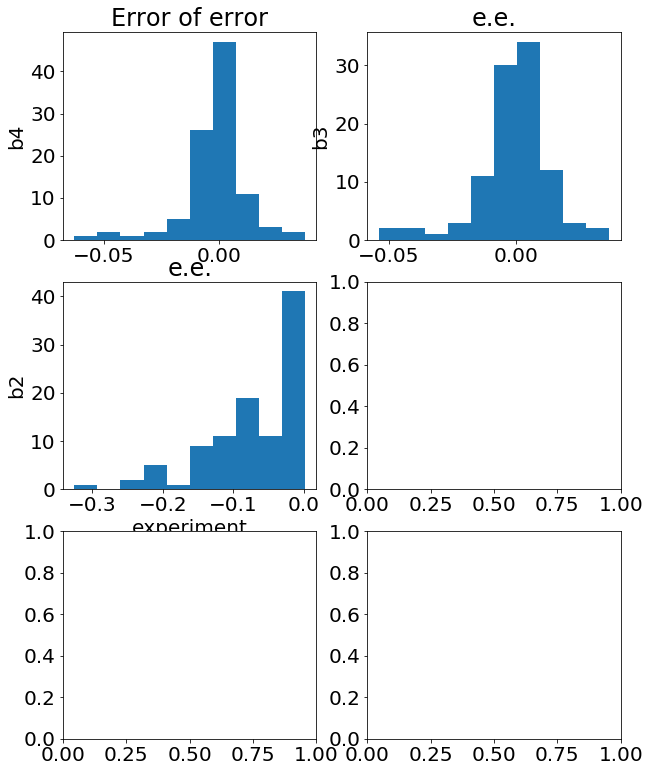

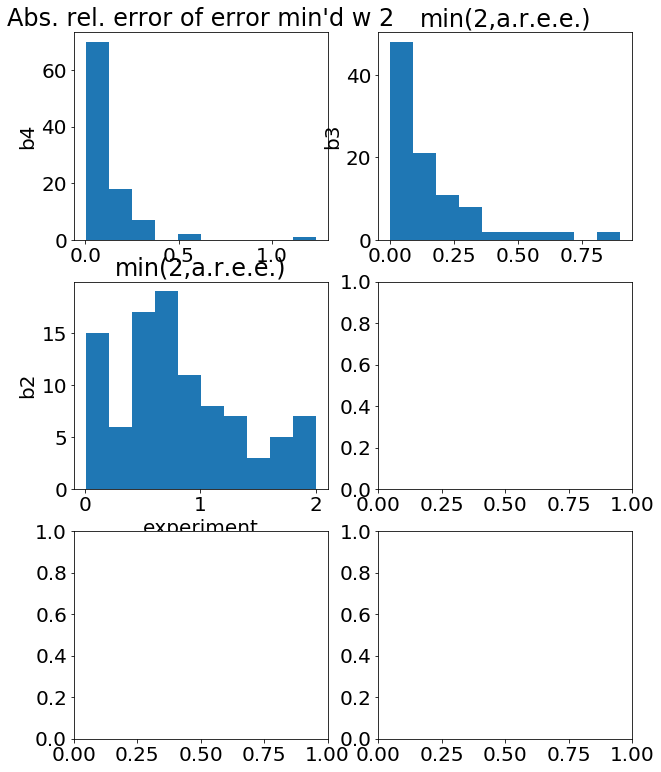

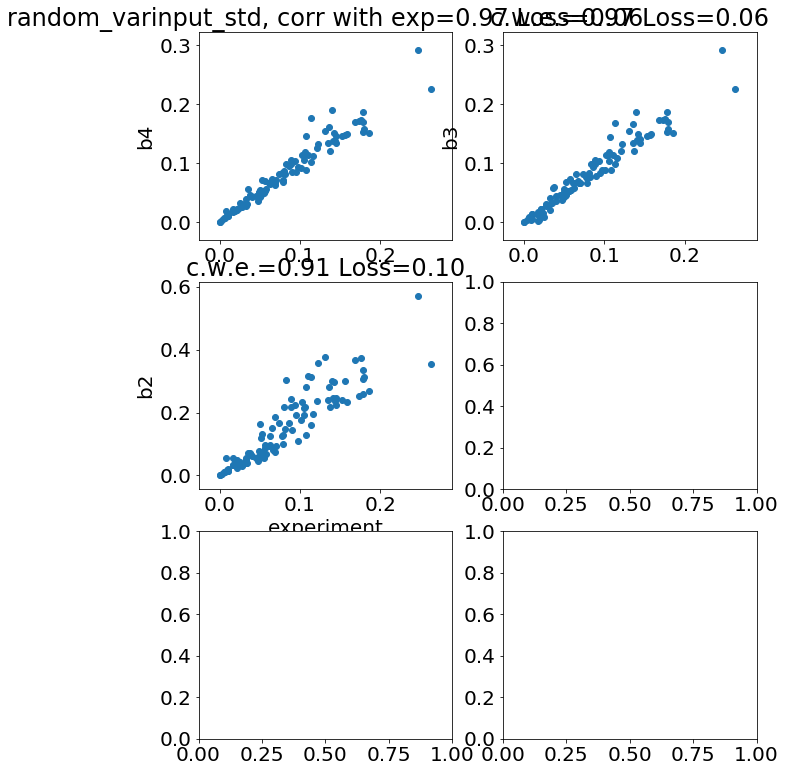

,bound,corr,rank_loss
0,b4,0.969860,0.056364
1,b3,0.968910,0.062626
2,b2,0.909978,0.104242


In [8]:
exp.process_scalar_output(rstd, 'random_varinput_std')

See that there's correlation of approximately 0.999... between theory (v3.exact and v3.better) and practive (experiment, mean over repetitions). Same is not true for the approximate bound which gives somethins about 0.90. Again, exact bound is better in rank loss. Squared version of the variance bound also doesn't work

### Comparing random networks on a fixed input

In [2]:
# pfailure for the first layer
p = 1e-2

# input to test
data = np.random.randn(1, 50) * 2 + 0.1

In [ ]:
# array with networks
results_mean = []
results_std = []

# looking at 50 random networks
for i in tqdm(range(100)):
    # run with random weights and multiple inputs
    exp = RandomExperiment([50, 50, 50, 1], p_inference = [0, p, 0, 0], activation = 'relu', std_weight = 3, mean_weight = 0.1)

    # obtaining data
    rmean, rstd = exp.run(data, repetitions = 50000)
    
    # adding to results
    results_mean += [rmean]
    results_std += [rstd]
    
    # removing the model
    K.clear_session()

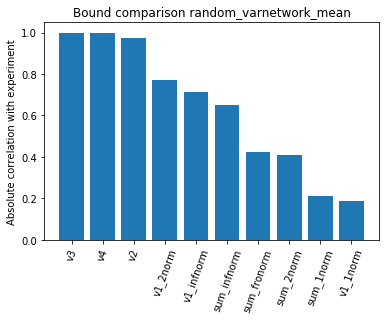

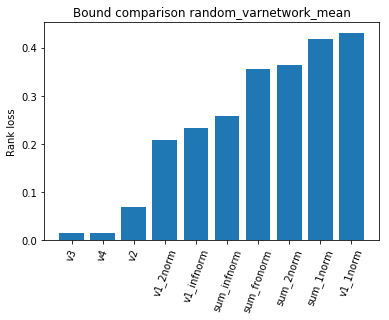

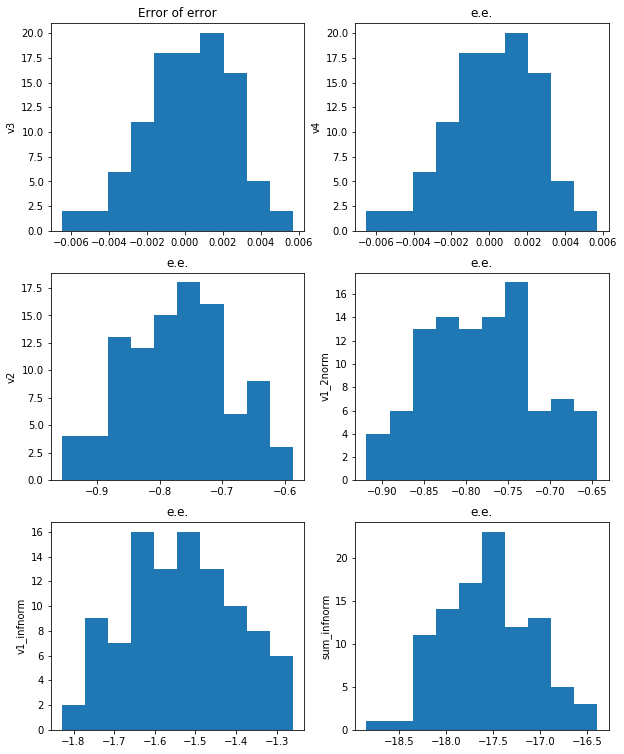

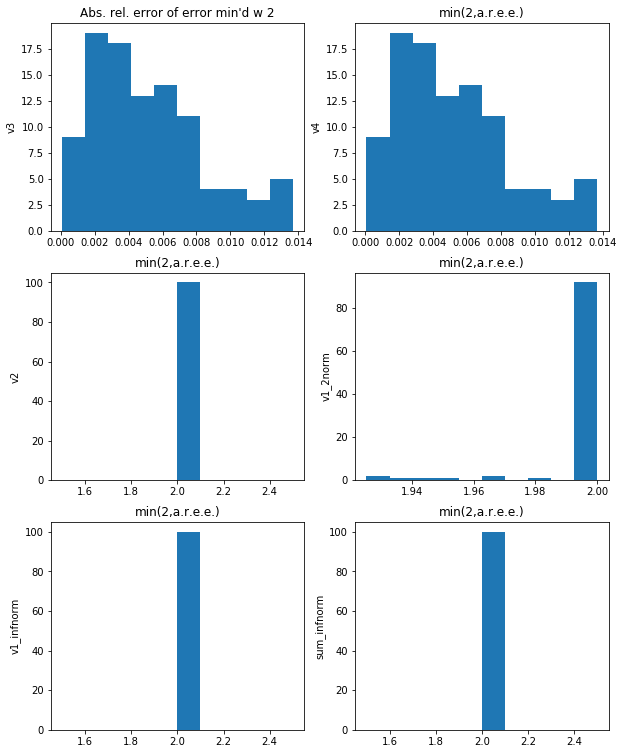

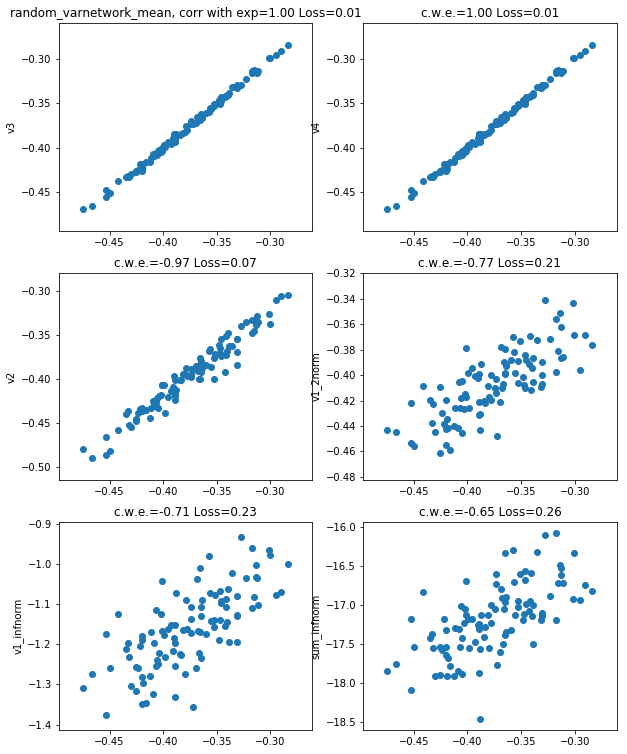

,bound,corr,rank_loss
0,v3,0.998475,0.014949
1,v4,0.998475,0.014949
2,v2,-0.973826,0.067879
3,v1_2norm,-0.771676,0.208081
4,v1_infnorm,-0.712257,0.233939
5,sum_infnorm,-0.649977,0.258384
6,sum_fronorm,-0.424858,0.355152
7,sum_2norm,-0.410238,0.363636
8,sum_1norm,-0.210934,0.418384
9,v1_1norm,-0.185468,0.431111


In [10]:
exp.process_scalar_output(exp.preprocess_scalar_input_scalar_output(results_mean), 'random_varnetwork_mean')

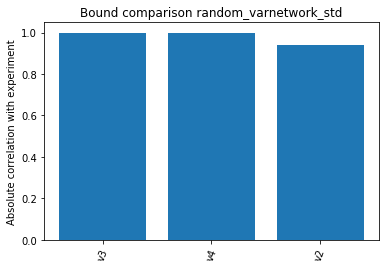

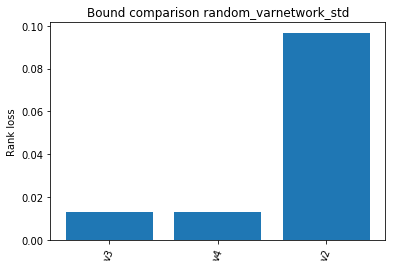

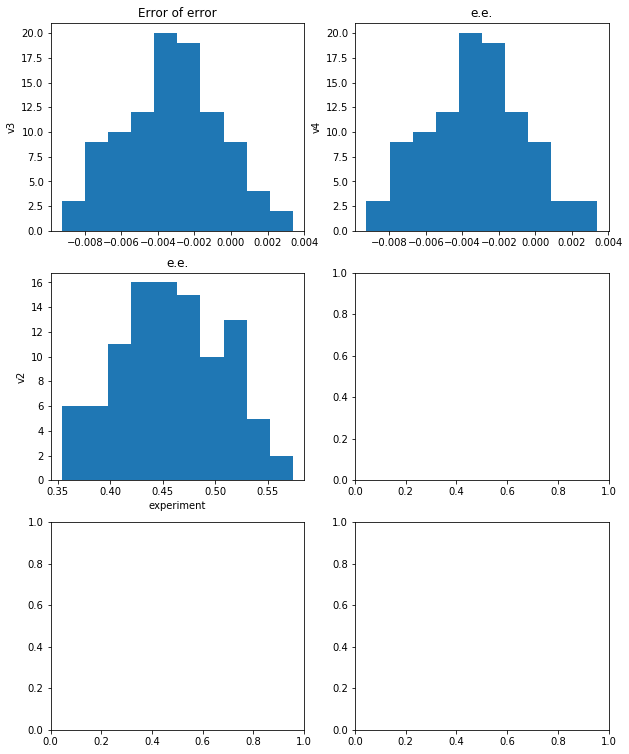

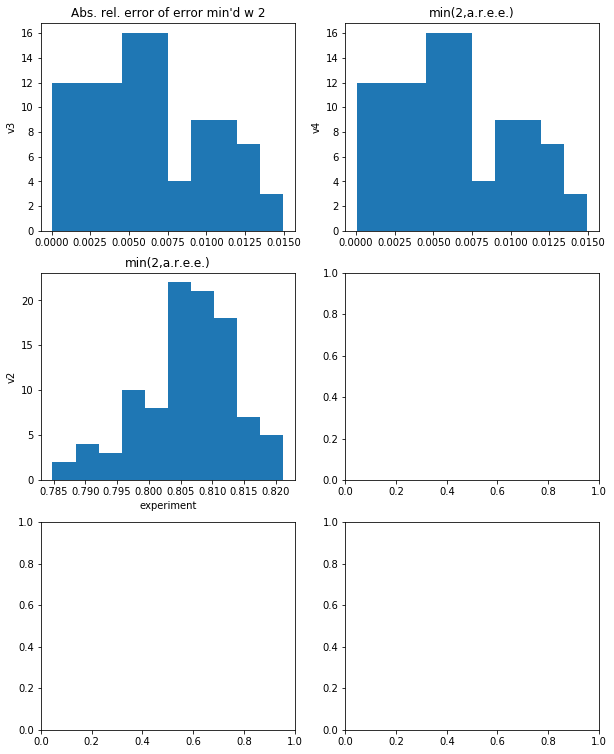

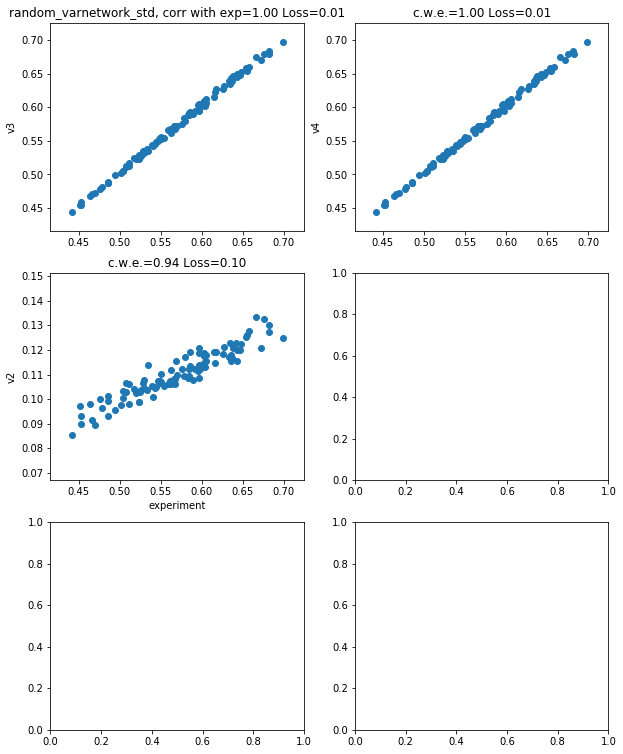

,bound,corr,rank_loss
0,v3,0.999035,0.012929
1,v4,0.999035,0.012929
2,v2,0.940451,0.096768


In [11]:
exp.process_scalar_output(exp.preprocess_scalar_input_scalar_output(results_std), 'random_varnetwork_std')